In [ ]:
import pandas as pd
import numpy as np
import os
import glob as gb
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/Final/gray/train.zip"
!unzip "/content/drive/MyDrive/Final/gray/valid.zip"

Archive:  /content/drive/MyDrive/Final/gray/train.zip
   creating: train/
   creating: train/angry/
 extracting: train/angry/0.jpg       
  inflating: train/angry/1.jpg       
  inflating: train/angry/10.jpg      
  inflating: train/angry/100.jpg     
  inflating: train/angry/101.jpg     
  inflating: train/angry/102.jpg     
  inflating: train/angry/103.jpg     
  inflating: train/angry/104.jpg     
  inflating: train/angry/105.jpg     
  inflating: train/angry/106.jpg     
  inflating: train/angry/107.jpg     
  inflating: train/angry/108.jpg     
  inflating: train/angry/109.jpg     
  inflating: train/angry/11.jpg      
  inflating: train/angry/110.jpg     
  inflating: train/angry/111.jpg     
  inflating: train/angry/112.jpg     
  inflating: train/angry/113.jpg     
  inflating: train/angry/114.jpg     
  inflating: train/angry/115.jpg     
  inflating: train/angry/116.jpg     
  inflating: train/angry/117.jpg     
  inflating: train/angry/118.jpg     
  inflating: train/angry/1

In [ ]:
TRAIN_DIR = "/content/train"
TEST_DIR = "/content/valid"
BATCH_SIZE=64

In [ ]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 110 in folder sad
For training data, found 149 in folder neutral
For training data, found 143 in folder surprise
For training data, found 142 in folder happy
For training data, found 120 in folder angry


In [ ]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 28 in folder sad
For testing data, found 38 in folder neutral
For testing data, found 35 in folder surprise
For testing data, found 34 in folder happy
For testing data, found 30 in folder angry


In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    
    random_image = random.sample(os.listdir(target_folder), 1)
    
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [ ]:
class_names = ['angry','happy','neutral','sad','surprise']

Image shape (224, 224)
Image shape (224, 224)
Image shape (224, 224)
Image shape (224, 224)
Image shape (224, 224)
Image shape (224, 224)
Image shape (224, 224)
Image shape (224, 224)
Image shape (224, 224)
Image shape (224, 224)
Image shape (224, 224)
Image shape (224, 224)
Image shape (224, 224)
Image shape (224, 224)
Image shape (224, 224)
Image shape (224, 224)
Image shape (224, 224)
Image shape (224, 224)


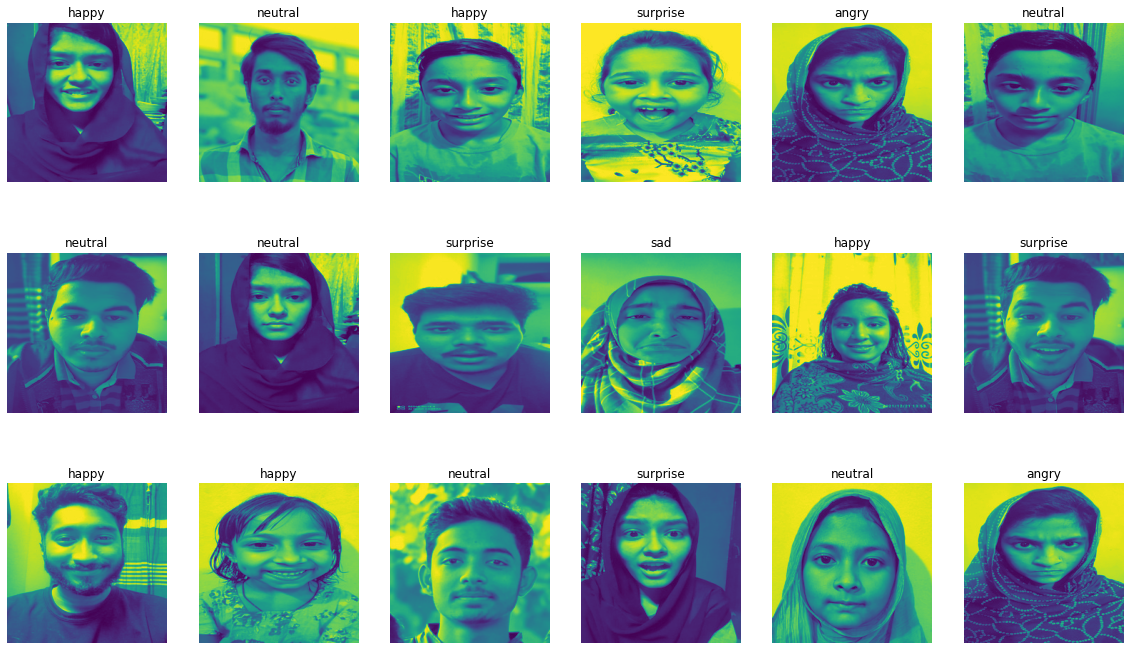

In [ ]:
plt.figure(figsize=(20,12))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="/content/drive/MyDrive/Final/gray/train/", target_class=class_name)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (64, 64),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (64, 64),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 664 images belonging to 5 classes.
Found 165 images belonging to 5 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 5, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()
history = model.fit(training_set,
                         epochs = 50,
                         validation_data = test_set)
model.save('model_gray.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

Text(0, 0.5, 'Accuracy')

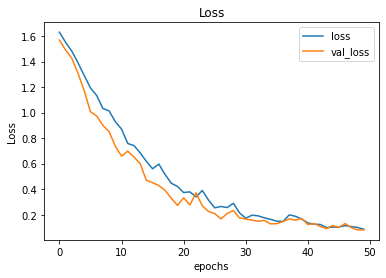

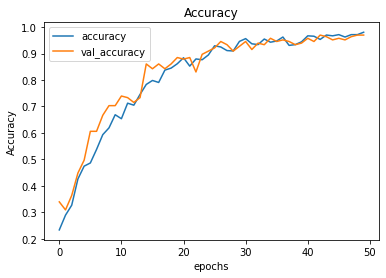

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [ ]:
model.evaluate(training_set)

11/11 [==============================] - 2s 160ms/step - loss: 0.0725 - accuracy: 0.9849


[0.07251077890396118, 0.9849397540092468]

In [ ]:
model.evaluate(test_set)

3/3 [==============================] - 0s 77ms/step - loss: 0.0810 - accuracy: 0.9697


[0.08095376938581467, 0.9696969985961914]

In [ ]:
test_set[1]

(array([[[[0.6666667 , 0.6666667 , 0.6666667 ],
          [0.6627451 , 0.6627451 , 0.6627451 ],
          [0.6666667 , 0.6666667 , 0.6666667 ],
          ...,
          [0.6156863 , 0.6156863 , 0.6156863 ],
          [0.60784316, 0.60784316, 0.60784316],
          [0.6039216 , 0.6039216 , 0.6039216 ]],
 
         [[0.69411767, 0.69411767, 0.69411767],
          [0.6901961 , 0.6901961 , 0.6901961 ],
          [0.6862745 , 0.6862745 , 0.6862745 ],
          ...,
          [0.627451  , 0.627451  , 0.627451  ],
          [0.62352943, 0.62352943, 0.62352943],
          [0.61960787, 0.61960787, 0.61960787]],
 
         [[0.7176471 , 0.7176471 , 0.7176471 ],
          [0.7176471 , 0.7176471 , 0.7176471 ],
          [0.70980394, 0.70980394, 0.70980394],
          ...,
          [0.6392157 , 0.6392157 , 0.6392157 ],
          [0.6313726 , 0.6313726 , 0.6313726 ],
          [0.627451  , 0.627451  , 0.627451  ]],
 
         ...,
 
         [[0.62352943, 0.62352943, 0.62352943],
          [0.29019

In [ ]:
pred=model.predict(test_set)

In [ ]:
y_test=[]

In [ ]:
for i in range (len(test_set)):
  for j in range (len(test_set[i][1])):
    y_test.append(np.argmax(test_set[i][1][j]))

In [ ]:
y_test

[4,
 4,
 3,
 1,
 3,
 2,
 4,
 1,
 3,
 0,
 1,
 3,
 3,
 2,
 1,
 0,
 3,
 3,
 2,
 2,
 1,
 4,
 1,
 0,
 1,
 0,
 1,
 2,
 2,
 4,
 1,
 3,
 4,
 4,
 4,
 0,
 3,
 2,
 0,
 2,
 4,
 3,
 3,
 2,
 3,
 2,
 4,
 0,
 4,
 2,
 1,
 4,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 4,
 1,
 4,
 4,
 0,
 4,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 4,
 2,
 0,
 0,
 4,
 1,
 2,
 2,
 4,
 2,
 1,
 3,
 1,
 0,
 3,
 2,
 4,
 1,
 1,
 4,
 4,
 2,
 2,
 4,
 0,
 0,
 1,
 3,
 2,
 2,
 1,
 3,
 3,
 2,
 0,
 2,
 3,
 3,
 3,
 4,
 4,
 4,
 2,
 4,
 3,
 2,
 2,
 4,
 3,
 1,
 0,
 1,
 2,
 2,
 0,
 2,
 0,
 0,
 4,
 1,
 1,
 0,
 3,
 1,
 3,
 2,
 3,
 0,
 0,
 3,
 4,
 0,
 3,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 2,
 4,
 0,
 4,
 4,
 0,
 3,
 4,
 4,
 0]

In [ ]:
pred=model.predict(test_set)

In [ ]:
y_pred=[]

In [ ]:
for i in range (len(pred)):
  y_pred.append(np.argmax(pred[i],axis=0))

In [ ]:
y_pred

[4,
 4,
 3,
 1,
 3,
 2,
 4,
 1,
 3,
 0,
 1,
 3,
 3,
 2,
 1,
 0,
 3,
 3,
 2,
 2,
 1,
 4,
 1,
 0,
 1,
 0,
 1,
 2,
 2,
 4,
 1,
 3,
 4,
 4,
 4,
 0,
 3,
 2,
 0,
 2,
 3,
 3,
 3,
 2,
 3,
 1,
 4,
 0,
 4,
 2,
 1,
 4,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 4,
 1,
 4,
 4,
 0,
 4,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 4,
 2,
 0,
 0,
 4,
 1,
 2,
 2,
 4,
 2,
 1,
 3,
 1,
 0,
 3,
 2,
 4,
 4,
 1,
 4,
 4,
 2,
 0,
 4,
 0,
 0,
 1,
 3,
 2,
 2,
 1,
 3,
 3,
 2,
 0,
 2,
 3,
 3,
 3,
 4,
 4,
 4,
 2,
 4,
 3,
 2,
 2,
 3,
 3,
 1,
 0,
 1,
 2,
 2,
 0,
 2,
 0,
 0,
 4,
 1,
 1,
 0,
 3,
 1,
 3,
 2,
 3,
 0,
 0,
 3,
 4,
 0,
 3,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 2,
 4,
 0,
 4,
 4,
 0,
 3,
 4,
 4,
 0]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

       angry       0.97      1.00      0.98        30
       happy       0.97      0.97      0.97        34
     neutral       1.00      0.95      0.97        38
         sad       0.93      1.00      0.97        28
    surprise       0.97      0.94      0.96        35

    accuracy                           0.97       165
   macro avg       0.97      0.97      0.97       165
weighted avg       0.97      0.97      0.97       165



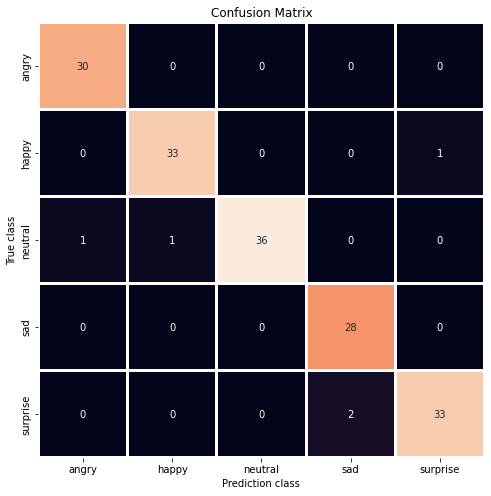

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index = class_names,
                     columns = class_names
                    )
final_cm = cm_df
plt.figure(figsize = (8,8))
sns.heatmap(final_cm, annot = True,cmap='rocket',cbar=False,linewidth=2,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()